In [1]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
import ast
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
url_input = input('Enter URL match')
url_input

'https://www.fotmob.com/es/matches/real-madrid-vs-atletico-madrid/2ubozo#4506819'

In [3]:
# check URL
url_input

'https://www.fotmob.com/es/matches/real-madrid-vs-atletico-madrid/2ubozo#4506819'

In [4]:
# FotMob
url = url_input

r = requests.get(url)

soup = bs(r.content)

soup.find('script', attrs={'id': '__NEXT_DATA__'})

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents

soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0]

json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

json_fotmob = json.loads(soup.find('script', attrs={'id': '__NEXT_DATA__'}).contents[0])

df_shots = pd.DataFrame(json_fotmob['props']['pageProps']['content']['shotmap']['shots'])
df_shots.head()

,id,eventType,teamId,playerId,playerName,x,y,min,minAdded,isBlocked,...,period,isOwnGoal,onGoalShot,isSavedOffLine,isFromInsideBox,firstName,lastName,fullName,teamColor,shortName
0,2728346641,AttemptSaved,8633,1077894,Jude Bellingham,97.184211,30.292000,4,NaN,True,...,FirstHalf,False,"{'x': 0.7982804232804226, 'y': 0.3227513211640...",False,True,Jude,Bellingham,Jude Bellingham,#085098,NaN
1,2728351047,AttemptSaved,9906,974753,Julián Álvarez,101.586207,46.593121,9,NaN,False,...,FirstHalf,False,"{'x': 1.4236111111111112, 'y': 0.0220829851322...",False,True,Julián,Álvarez,Julián Álvarez,#C63527,NaN
2,2728359169,AttemptSaved,8633,743533,Federico Valverde,79.556796,24.349554,17,NaN,False,...,FirstHalf,False,"{'x': 0.2738095238095226, 'y': 0.2582010569312...",False,False,Federico,Valverde,Federico Valverde,#085098,NaN
3,2728366767,AttemptSaved,9906,184138,Antoine Griezmann,84.512136,28.118810,25,NaN,True,...,FirstHalf,False,"{'x': 1.1008597883597888, 'y': 0.3227513211640...",False,False,Antoine,Griezmann,Antoine Griezmann,#C63527,NaN
4,2728368289,Miss,8633,743533,Federico Valverde,75.502427,31.255000,27,NaN,False,...,FirstHalf,False,"{'x': 2, 'y': 0.6362305594136604, 'zoomRatio':...",False,False,Federico,Valverde,Federico Valverde,#085098,NaN


In [5]:
# check if True in isOwnGoal
df_shots[['eventType', 'expectedGoals', 'situation', 'isOwnGoal']]

,eventType,expectedGoals,situation,isOwnGoal
0,AttemptSaved,0.148064,RegularPlay,False
1,AttemptSaved,0.051524,RegularPlay,False
2,AttemptSaved,0.028383,RegularPlay,False
3,AttemptSaved,0.046836,RegularPlay,False
4,Miss,0.013824,SetPiece,False
5,AttemptSaved,0.039140,RegularPlay,False
6,AttemptSaved,0.238825,SetPiece,False
7,AttemptSaved,0.023334,FastBreak,False
8,AttemptSaved,0.054191,FromCorner,False
9,AttemptSaved,0.043681,FromCorner,False


In [6]:
# check if exists NaN in expectedGoals

has_nan = df_shots['expectedGoals'].isna().any()
print(has_nan)  # Returns True if there are NaN values, False otherwise

# nan_count = df_shots['expectedGoals'].isna().sum()
# print(nan_count)  # Returns the number of NaN values in the column

# no_nan = df_shots['expectedGoals'].notna().all()
# print(no_nan)  # Returns True if no NaN values are present

# df_shots.info()

False


In [7]:
df_shots[['eventType', 'expectedGoals', 'isOwnGoal']]

,eventType,expectedGoals,isOwnGoal
0,AttemptSaved,0.148064,False
1,AttemptSaved,0.051524,False
2,AttemptSaved,0.028383,False
3,AttemptSaved,0.046836,False
4,Miss,0.013824,False
5,AttemptSaved,0.039140,False
6,AttemptSaved,0.238825,False
7,AttemptSaved,0.023334,False
8,AttemptSaved,0.054191,False
9,AttemptSaved,0.043681,False


In [8]:
# If you want to convert it to a LIST add .tolist()

# xG = df_shots['expectedGoals']
# xG_list = xG.tolist()
# xG_list

# xG=df_shots.expectedGoals
# xG

# xG_loc = df_shots.loc[:, 'expectedGoals']
# xG_loc

xG_get = df_shots.get('expectedGoals')
xG_get

# Using .iloc[]: If you know the position of the name column (e.g., if it's the first column):
# column_position = df_shots.columns.get_loc('expectedGoals')

# column_position
# xG_iloc = df_shots.iloc[:, 15]
# xG_iloc

0     0.148064
1     0.051524
2     0.028383
3     0.046836
4     0.013824
5     0.039140
6     0.238825
7     0.023334
8     0.054191
9     0.043681
10    0.016543
11    0.048433
12    0.057222
13    0.035031
14    0.025457
15    0.033069
16    0.064535
17    0.016739
18    0.031448
19    0.144753
20    0.049768
21    0.038313
22    0.745988
23    0.057792
Name: expectedGoals, dtype: float64

In [5]:
# Replace NaN with 0
# df_shots['expectedGoals'].fillna(0, inplace=True)

# Replace with the mean of the column:
# df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].mean(), inplace=True)

# Replace with the median of the column:
df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


/tmp/ipykernel_39951/3470650161.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shots['expectedGoals'].fillna(df_shots['expectedGoals'].median(), inplace=True)


In [13]:
# get local team id
local_team_id = json_fotmob['props']['pageProps']['general']['homeTeam']['id']
local_team_id

9906

In [14]:
# get general data
json_fotmob['props']['pageProps']['general']

{'matchId': '4506819',
 'matchName': 'Atletico Madrid-vs-Real Madrid_Sun, Sep 29, 2024, 19:00 UTC',
 'matchRound': '8',
 'teamColors': {'darkMode': {'home': '#C63527', 'away': '#ffffff'},
  'lightMode': {'home': '#C63527', 'away': '#085098'},
  'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(29, 29, 29, 1.0)'},
  'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
   'away': 'rgba(255, 255, 255, 1.0)'}},
 'leagueId': 87,
 'leagueName': 'LaLiga',
 'leagueRoundName': 'Round 8',
 'parentLeagueId': 87,
 'countryCode': 'ESP',
 'parentLeagueName': 'LaLiga',
 'parentLeagueSeason': '2024/2025',
 'parentLeagueTopScorerLink': 'https://data.fotmob.com/stats/87/season/23686/goals.json',
 'homeTeam': {'name': 'Atletico Madrid', 'id': 9906},
 'awayTeam': {'name': 'Real Madrid', 'id': 8633},
 'coverageLevel': 'xG',
 'matchTimeUTC': 'Sun, Sep 29, 2024, 19:00 UTC',
 'matchTimeUTCDate': '2024-09-29T19:00:00.000Z',
 'started': True,
 'finished': True}

In [15]:
# get league name and league round for the viz
leagueName = json_fotmob['props']['pageProps']['general']['leagueName']
print(leagueName)
leagueRound = json_fotmob['props']['pageProps']['general']['leagueRoundName']
print(leagueRound)

LaLiga
Round 8


In [16]:
league_title = leagueName + ' | ' + leagueRound
league_title

'LaLiga | Round 8'

In [17]:
# local team info and away team info
json_fotmob['props']['pageProps']['header']['teams']

[{'name': 'Atletico Madrid',
  'id': 9906,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/9906_small.png',
  'pageUrl': '/teams/9906/overview/atletico-madrid',
  'fifaRank': None},
 {'name': 'Real Madrid',
  'id': 8633,
  'score': 1,
  'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/8633_small.png',
  'pageUrl': '/teams/8633/overview/real-madrid',
  'fifaRank': None}]

In [18]:
# Get ID and team names
local_team_name = json_fotmob['props']['pageProps']['header']['teams'][0]['name']
print(local_team_name)
away_team_name = json_fotmob['props']['pageProps']['header']['teams'][1]['name']
print(away_team_name)

Atletico Madrid
Real Madrid


In [19]:
# score
local_team_score = json_fotmob['props']['pageProps']['header']['teams'][0]['score']
print(local_team_score)
away_team_score = json_fotmob['props']['pageProps']['header']['teams'][1]['score']
print(away_team_score)

1
1


In [20]:
# title for the viz
plot_title = local_team_name + ' ' + str(local_team_score) + '-' + str(away_team_score) + ' ' + away_team_name
plot_title

'Atletico Madrid 1-1 Real Madrid'

In [15]:
# Get color teams
json_fotmob['props']['pageProps']['general']['teamColors']

{'darkMode': {'home': '#FFFFFF', 'away': '#6f3c9c'},
 'lightMode': {'home': '#C90F20', 'away': '#63257E'},
 'fontDarkMode': {'home': 'rgba(29, 29, 29, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'},
 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
  'away': 'rgba(255, 255, 255, 1.0)'}}

In [21]:
# local and away team names for the viz
shots_local_name = local_team_name + ' ' + 'shots'
shots_local_name = shots_local_name.upper()
print(shots_local_name)

shots_away_name = away_team_name + ' ' + 'shots'
shots_away_name = shots_away_name.upper()
print(shots_away_name)

ATLETICO MADRID SHOTS
REAL MADRID SHOTS


In [22]:
# check type isOwnGoal | looks like a boolean
type('isOwnGoal')

str

In [86]:
df_shots.columns

Index(['id', 'eventType', 'teamId', 'playerId', 'playerName', 'x', 'y', 'min',
       'minAdded', 'isBlocked', 'isOnTarget', 'blockedX', 'blockedY',
       'goalCrossedY', 'goalCrossedZ', 'expectedGoals',
       'expectedGoalsOnTarget', 'shotType', 'situation', 'period', 'isOwnGoal',
       'onGoalShot', 'isSavedOffLine', 'isFromInsideBox', 'firstName',
       'lastName', 'fullName', 'teamColor'],
      dtype='object')

In [29]:
type('isOwnGoal')

str

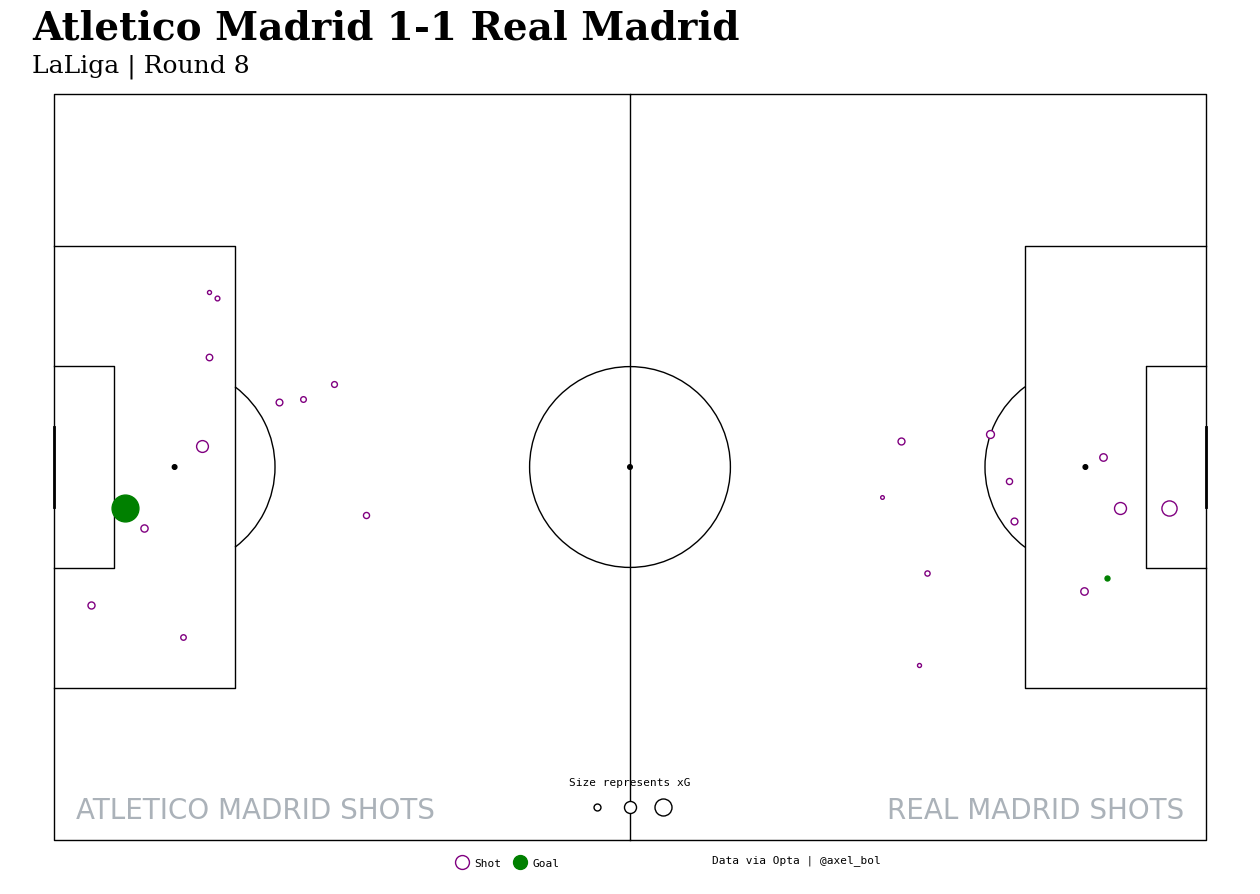

In [25]:
# add facecolor='red' if you want the color red around the pitch
fig, ax = plt.subplots(figsize=(16, 12))
pitch = Pitch(pitch_type='custom', pitch_length=105, pitch_width=68, line_color='black', linewidth=1, pitch_color='white', label=False)
pitch.draw(ax=ax)

# plot the shots
# We want the size of the shot to be 500 * the expected goals value
# We also want to leave the marker empty if the shot was missed and fill it if it was a goal
for x in df_shots.to_dict(orient='records'):
    if x['teamId'] == local_team_id:
        # We want to plot the local team on right side of the pitch
        # So we need to mirror both the x and y coordinates
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        )
        pitch.scatter(
            x=105-x['x'],
            y=68-x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            # alpha=1 if x['eventType'] == 'Goal' else 0.5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )
    # left side
    else:
        c_color = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'white'
        ),
        ec_edge_colors = (
            'green' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'False'
            else 'red' if x['eventType'] == 'Goal' and str(x['isOwnGoal']) == 'True'
            else 'purple'
        )
        pitch.scatter(
            x=x['x'],
            y=x['y'],
            ax=ax,
            s=500*x['expectedGoals'],
            ec=ec_edge_colors,
            c=c_color,
            # alpha=1 if x['eventType'] == 'Goal' else .5,
            zorder=2 if x['eventType'] == 'Goal' else 1
        )

# fig.suptitle('The Strongest - Bolivar',  fontsize=15, fontweight=600)
# plt.title('Title', x=0.1, y=1)
# ax.set_title('División Profesional', x=0.1, y=0.95, fontsize=10, fontweight=600, color='black', loc='left')

# We can also add a title directly above the text we added
ax.text(-2, 73, plot_title, ha='left', fontsize=28, fontfamily='serif', fontweight=600, color='black')
ax.text(-2, 70, league_title, ha='left', fontsize=18, fontfamily='serif', fontweight=100)

# We can add a title above the different halves of the pitch
ax.text(2, 2, shots_local_name, ha='left', fontsize=20, fontweight=500, color='#abb2b9')
ax.text(103, 2, shots_away_name, ha='right', fontsize=20, fontweight=500, color='#abb2b9')

# Lets also add a legend for the size of the shots in the bottom middle of the pitch
pitch.scatter(49.5, 3, s=500*.05, ec='black', c='white', ax=ax)
pitch.scatter(52.5, 3, s=500*.15, ec='black', c='white', ax=ax)
pitch.scatter(55.5, 3, s=500*.3, ec='black', c='white', ax=ax)
# We can add a label for the legend
ax.text(52.5, 5, 'Size represents xG', ha='center', fontsize=8, fontfamily='monospace')
# Legend
if 'True' in str(df_shots['isOwnGoal'].values):
    pitch.scatter(29.3, -2, s=500*.2, ec='red', c='red', ax=ax)
    ax.text(33, -2.4, 'Own Goal', ha='center', fontsize=8, fontfamily='monospace')
pitch.scatter(37.2, -2, s=500*.2, ec='purple', c='white', ax=ax)
ax.text(39.5, -2.4, 'Shot', ha='center', fontsize=8, fontfamily='monospace')
pitch.scatter(42.5, -2, s=500*.2, ec='green', c='green', ax=ax)
ax.text(44.8, -2.4, 'Goal', ha='center', fontsize=8, fontfamily='monospace')
# info
ax.text(60, -2, 'Data via Opta | @axel_bol', ha='left', fontsize=8, fontfamily='monospace')
plt.savefig('/home/axel/Code/images/image1.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.35)

plt.show()